<a href="https://colab.research.google.com/github/NFalah25/PCVK/blob/main/Week%205/Week5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Nama : Naufal Falah Wafiuddin
## Kelas : TI - 3A
## Absen : 23
## NIM : 2141720129

#### 1. Buat Gamma Correction sesuai dengan petunjuk berikut

Berikut adalah kode untuk
meminta masukan nilai dari pengguna. Lanjutkan kode tersebut dengan membuat image
dengan gamma correction sesuai rumus yang telah diberikan.


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import cv2 as cv
from google.colab.patches import cv2_imshow
from skimage import io
import matplotlib.pyplot as plt
import numpy as np
from math import log10, sqrt
import glob

 Gamma Correction pada citra 
----------------------------------
Masukkan nilai Gamma: 3


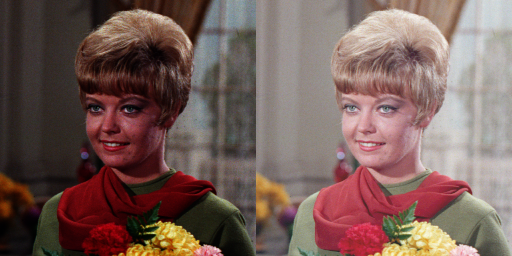

In [ ]:
print(' Gamma Correction pada citra ')
print('----------------------------------')
try:
 gamma = int(input('Masukkan nilai Gamma: '))
except ValueError:
 print('Error, not a number')

def adjust_gamma(image, gamma):
    # build a lookup table mapping the pixel values [0, 255] to
    # their adjusted gamma values
    invGamma = 1.0 / gamma
    table = np.array([((i / 255.0) ** invGamma) * 255
        for i in np.arange(0, 256)]).astype("uint8")

    # apply gamma correction using the lookup table
    return cv2.LUT(image, table)

img = cv.imread('/content/drive/MyDrive/PCVK/female.tiff')
gammaImg = gammaCorrection(img, gamma)

final_frame = cv.hconcat((img, gammaImg))
cv2_imshow(final_frame)

#### 2. Buat Simulasi Image Depth

Percobaan ini digunakan sebagai simulasi dari proses kuantisasi citra. Pada kuantisasi citra,
pixel dapat direpresentasikan dengan n-bit kedalaman (default menggunakan 8-bit). Pada
pixel 8-bit, warna yang memungkinkan adalah 256 warna, dari 0 (0000 0000) hingga
255(1111 1111). Pada pixel 7-bit, warna yang memungkinkan adalah 128 warna, dari 0 (000
0000) hingga 127 (111 1111). Kemungkinan warna didapat dari pangkat 2 jumlah bit. Jika
7bit, maka jumlah warnanya adalah 27
 = 128, dst.

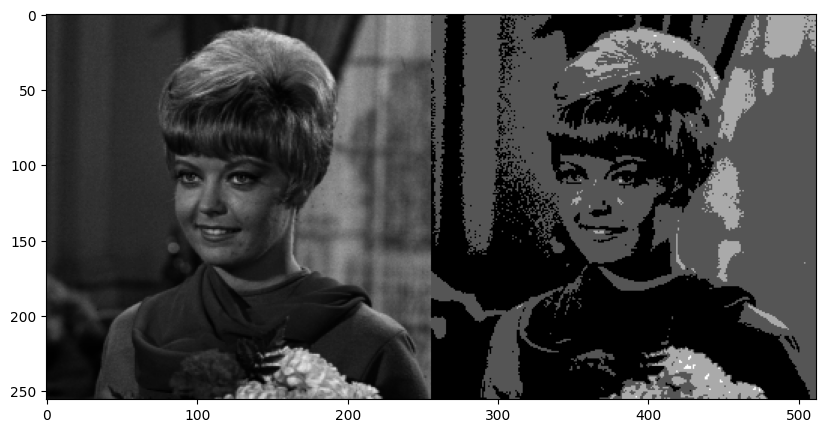

In [ ]:
bit_depth=2
level = 255 / (pow(2,bit_depth)-1)
original = cv.imread('/content/drive/MyDrive/PCVK/female.tiff', cv.IMREAD_GRAYSCALE)
depth_image = np.zeros(original.shape, original.dtype)

for i in range(original.shape[0]):
    for j in range(original.shape[1]):
        depth_image[i, j] = round(original[i, j] / level) * level

plt.figure(figsize=(10, 5))

combined_image = np.concatenate((original, depth_image), axis=1)

plt.imshow(combined_image, cmap='gray')


plt.show()

3. Buat Modul Average Denoising

In [ ]:
import glob
cv_img = []
for img in glob.glob('/content/drive/MyDrive/PCVK/noises/*.jpg'):
  n= cv.imread(img)
  cv_img.append(n)

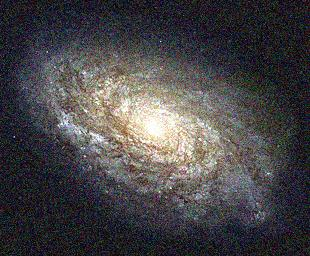

In [ ]:
dst = cv.fastNlMeansDenoisingColoredMulti(cv_img, 99, 1)
cv2_imshow(n)

In [ ]:
import math

def PSNR(img,amount):
  first_image = img[0]
  for x in range(1,amount):
    if(x==0):
      continue
    first_image = first_image - img[x]
    #print(x)
  mse = np.mean((first_image) ** amount)
  if(mse == 0):
    return 100
  max_pixel = 255.0
  psnr = 20 * math.log10(max_pixel / math.sqrt(mse))
  return psnr

print('PSNR')
print('------------------------------')
try:
  averageCitra = int(input('Masukan jumlah citra average: '))
except ValueError:
  print('Error, not a number')
result = PSNR(cv_img,averageCitra)
print('Nilai PSNR: ')
print(result)

PSNR
------------------------------
Masukan jumlah citra average: 5
Nilai PSNR: 
28.352510635420053


Nilai PSNR adalah 27.532402114739867 (dB)


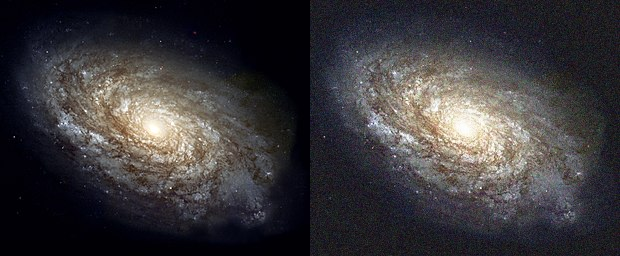

In [ ]:
import glob
from math import log10, sqrt

original = cv.imread('/content/drive/MyDrive/PCVK/galaxy.jpg')
cv_img = []
for img in glob.glob('/content/drive/MyDrive/PCVK/noises/*.jpg'):
    n = cv.imread(img)
    cv_img.append(n)

dst = cv_img[0]
noise_number = 4 # nomor (array) gambar pada folder noises
for i in range(noise_number):
    if i == 0:
        pass
    else:
        alpha = 1.0 / (i + 1)
        beta = 1.0 - alpha
        dst = cv.addWeighted(cv_img[i], alpha, dst, beta, 0.0)


def PSNR(original, compressed):
    mse = np.mean((original - compressed) ** 2)
    if(mse == 0):  # MSE is zero means no noise is present in the signal.
                  # Therefore PSNR have no importance.
        return 100
    max_pixel = 255.0
    psnr = 20 * log10(max_pixel / sqrt(mse))
    return psnr

compressed = dst
psnr = PSNR(original, compressed)

print('Nilai PSNR adalah',psnr,'(dB)')
galaxy_frame = cv.hconcat((original, dst))
cv2_imshow(galaxy_frame)

Nilai PSNR adalah 27.537286568104903 (dB)


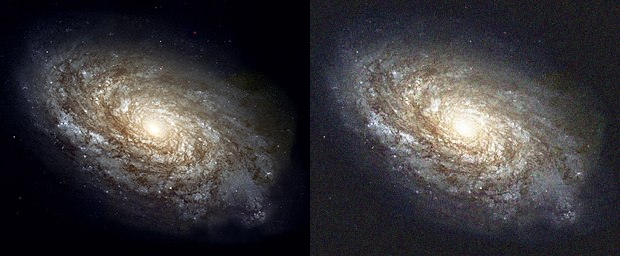

In [ ]:
#Jumlah Citra di Average 5
dst = cv_img[0]
noise = 5
for i in range(noise):
    if i == 0:
        pass
    else:
        alpha = 1.0 / (i + 1)
        beta = 1.0 - alpha
        dst = cv.addWeighted(cv_img[i], alpha, dst, beta, 0.0)

compressed = dst
psnr = PSNR(original, compressed)

print('Nilai PSNR adalah',psnr,'(dB)')
galaxy_frame = cv.hconcat((original, dst))
cv2_imshow(galaxy_frame)

Nilai PSNR adalah 27.562622935071154 (dB)


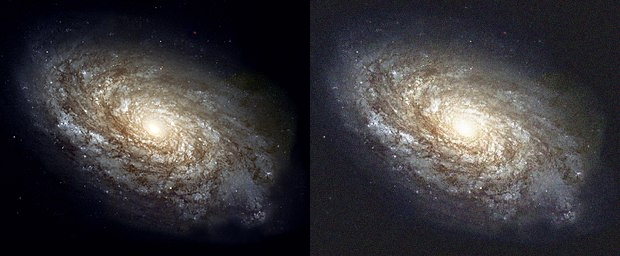

In [ ]:
#Jumlah Citra di Average 10
dst = cv_img[0]
noise = 10
for i in range(noise):
    if i == 0:
        pass
    else:
        alpha = 1.0 / (i + 1)
        beta = 1.0 - alpha
        dst = cv.addWeighted(cv_img[i], alpha, dst, beta, 0.0)

compressed = dst
psnr = PSNR(original, compressed)

print('Nilai PSNR adalah',psnr,'(dB)')
galaxy_frame = cv.hconcat((original, dst))
cv2_imshow(galaxy_frame)

Nilai PSNR adalah 27.54267673226257 (dB)


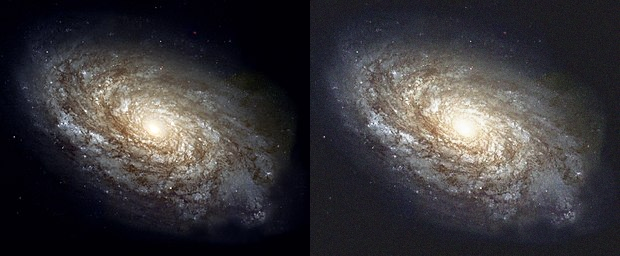

In [ ]:
#Jumlah Citra di Average 20
dst = cv_img[0]
noise = 20
for i in range(noise):
    if i == 0:
        pass
    else:
        alpha = 1.0 / (i + 1)
        beta = 1.0 - alpha
        dst = cv.addWeighted(cv_img[i], alpha, dst, beta, 0.0)

compressed = dst
psnr = PSNR(original, compressed)

print('Nilai PSNR adalah',psnr,'(dB)')
galaxy_frame = cv.hconcat((original, dst))
cv2_imshow(galaxy_frame)

Nilai PSNR adalah 27.51099831785 (dB)


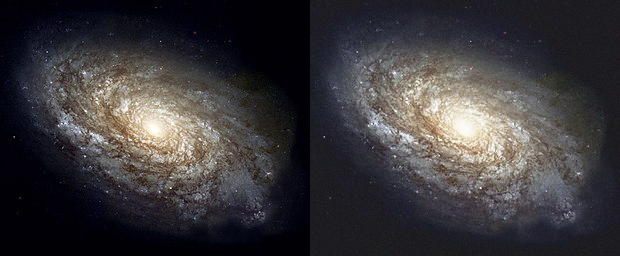

In [ ]:
#Jumlah Citra di Average 40
dst = cv_img[0]
noise = 40
for i in range(noise):
    if i == 0:
        pass
    else:
        alpha = 1.0 / (i + 1)
        beta = 1.0 - alpha
        dst = cv.addWeighted(cv_img[i], alpha, dst, beta, 0.0)

compressed = dst
psnr = PSNR(original, compressed)

print('Nilai PSNR adalah',psnr,'(dB)')
galaxy_frame = cv.hconcat((original, dst))
cv2_imshow(galaxy_frame)

Nilai PSNR adalah 27.505060049853075 (dB)


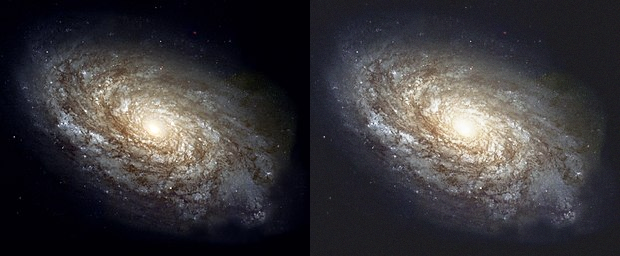

In [ ]:
#Jumlah Citra di Average 80
dst = cv_img[0]
noise = 80
for i in range(noise):
    if i == 0:
        pass
    else:
        alpha = 1.0 / (i + 1)
        beta = 1.0 - alpha
        dst = cv.addWeighted(cv_img[i], alpha, dst, beta, 0.0)

compressed = dst
psnr = PSNR(original, compressed)

print('Nilai PSNR adalah',psnr,'(dB)')
galaxy_frame = cv.hconcat((original, dst))
cv2_imshow(galaxy_frame)

Nilai PSNR adalah 27.510046807967065 (dB)


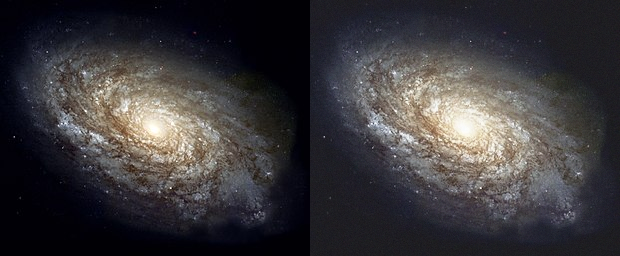

In [ ]:
#Jumlah Citra di Average 100
dst = cv_img[0]
noise = 100
for i in range(noise):
    if i == 0:
        pass
    else:
        alpha = 1.0 / (i + 1)
        beta = 1.0 - alpha
        dst = cv.addWeighted(cv_img[i], alpha, dst, beta, 0.0)

compressed = dst
psnr = PSNR(original, compressed)

print('Nilai PSNR adalah',psnr,'(dB)')
galaxy_frame = cv.hconcat((original, dst))
cv2_imshow(galaxy_frame)

#### 4. Buat image masking untuk image berikut. Image kiri adalah image asli (image ktp) sedangkan image paling kanan adalah hasilnya

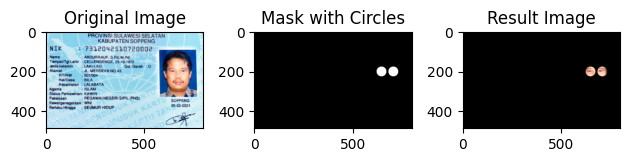

In [ ]:
import matplotlib.pyplot as plt
import cv2 as cv
import numpy as np

img = cv.imread('/content/drive/MyDrive/PCVK/KTP.jpeg')

mask = np.zeros_like(img)

center_coordinates1 = (645, 200)
radius1 = 25
color = (255, 255, 255)
thickness = -1
cv.circle(mask, center_coordinates1, radius1, color, thickness)

center_coordinates2 = (705, 200)
radius2 = 25
cv.circle(mask, center_coordinates2, radius2, color, thickness)

result = cv.bitwise_and(img, mask)

plt.subplot(131)
plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
plt.title('Original Image')

plt.subplot(132)
plt.imshow(cv.cvtColor(mask, cv.COLOR_BGR2RGB))
plt.title('Mask with Circles')

plt.subplot(133)
plt.imshow(cv.cvtColor(result, cv.COLOR_BGR2RGB))
plt.title('Result Image')

plt.tight_layout()
plt.show()


####5. Lakukan percobaan menggunakan operator lain dan tunjukkan hasilnya pada modul ini.

Tuliskan hasil analisa anda kenapa citra keluarannya seperti itu

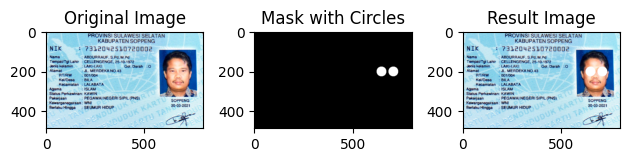

In [38]:
# OR

import matplotlib.pyplot as plt
import cv2 as cv
import numpy as np

img = cv.imread('/content/drive/MyDrive/PCVK/KTP.jpeg')

mask = np.zeros_like(img)

center_coordinates1 = (645, 200)
radius1 = 25
color = (255, 255, 255)
thickness = -1
cv.circle(mask, center_coordinates1, radius1, color, thickness)

center_coordinates2 = (705, 200)
radius2 = 25
cv.circle(mask, center_coordinates2, radius2, color, thickness)
result = img | mask

plt.subplot(131)
plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
plt.title('Original Image')

plt.subplot(132)
plt.imshow(cv.cvtColor(mask, cv.COLOR_BGR2RGB))
plt.title('Mask with Circles')

plt.subplot(133)
plt.imshow(cv.cvtColor(result, cv.COLOR_BGR2RGB))
plt.title('Result Image')

plt.tight_layout()
plt.show()

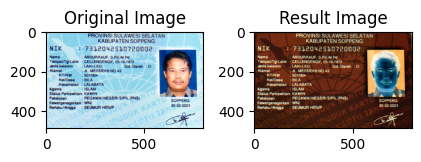

In [39]:
# NOT

import matplotlib.pyplot as plt
import cv2 as cv
import numpy as np

img = cv.imread('/content/drive/MyDrive/PCVK/KTP.jpeg')

mask = np.zeros_like(img)

center_coordinates1 = (645, 200)
radius1 = 25
color = (255, 255, 255)
thickness = -1
cv.circle(mask, center_coordinates1, radius1, color, thickness)

center_coordinates2 = (705, 200)
radius2 = 25
cv.circle(mask, center_coordinates2, radius2, color, thickness)
result = ~img

plt.subplot(131)
plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
plt.title('Original Image')

# plt.subplot(132)
# plt.imshow(cv.cvtColor(mask, cv.COLOR_BGR2RGB))
# plt.title('Mask with Circles')

plt.subplot(132)
plt.imshow(cv.cvtColor(result, cv.COLOR_BGR2RGB))
plt.title('Result Image')

plt.tight_layout()
plt.show()


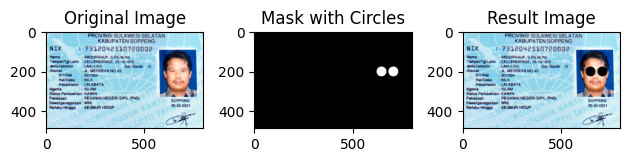

In [40]:
from numpy.ma.core import bitwise_and
# NAND

import matplotlib.pyplot as plt
import cv2 as cv
import numpy as np

img = cv.imread('/content/drive/MyDrive/PCVK/KTP.jpeg')

mask = np.zeros_like(img)

center_coordinates1 = (645, 200)
radius1 = 25
color = (255, 255, 255)
thickness = -1
cv.circle(mask, center_coordinates1, radius1, color, thickness)

center_coordinates2 = (705, 200)
radius2 = 25
cv.circle(mask, center_coordinates2, radius2, color, thickness)

result = bitwise_and(img, ~mask)

plt.subplot(131)
plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
plt.title('Original Image')

plt.subplot(132)
plt.imshow(cv.cvtColor(mask, cv.COLOR_BGR2RGB))
plt.title('Mask with Circles')

plt.subplot(133)
plt.imshow(cv.cvtColor(result, cv.COLOR_BGR2RGB))
plt.title('Result Image')

plt.tight_layout()
plt.show()

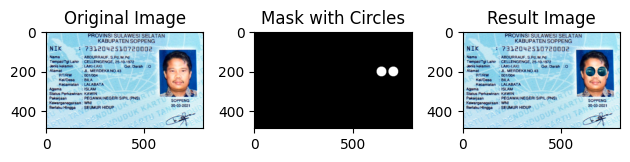

In [41]:
# XOR

import matplotlib.pyplot as plt
import cv2 as cv
import numpy as np

img = cv.imread('/content/drive/MyDrive/PCVK/KTP.jpeg')

mask = np.zeros_like(img)

center_coordinates1 = (645, 200)
radius1 = 25
color = (255, 255, 255)
thickness = -1
cv.circle(mask, center_coordinates1, radius1, color, thickness)

center_coordinates2 = (705, 200)
radius2 = 25
cv.circle(mask, center_coordinates2, radius2, color, thickness)

result = cv.bitwise_xor(img, mask)

plt.subplot(131)
plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
plt.title('Original Image')

plt.subplot(132)
plt.imshow(cv.cvtColor(mask, cv.COLOR_BGR2RGB))
plt.title('Mask with Circles')

plt.subplot(133)
plt.imshow(cv.cvtColor(result, cv.COLOR_BGR2RGB))
plt.title('Result Image')

plt.tight_layout()
plt.show()